# Layers

gdsfactory includes a generic example Technology in `gdsfactory.tech` that you can use as an inspiration to create your own.


Each foundry uses different GDS numbers for each process step.

We follow the generic layer numbers from the book "Silicon Photonics Design: From Devices to Systems Lukas Chrostowski, Michael Hochberg".

| GDS (layer, purpose) | layer_name | Description                                                 |
| -------------------- | ---------- | ----------------------------------------------------------- |
| 1 , 0                | WG         | 220 nm Silicon core                                         |
| 2 , 0                | SLAB150    | 150nm Silicon slab (70nm shallow Etch for grating couplers) |
| 3 , 0                | SLAB90     | 90nm Silicon slab (for modulators)                          |
| 4, 0                 | DEEPTRENCH | Deep trench                                                 |
| 47, 0                | MH         | heater                                                      |
| 41, 0                | M1         | metal 1                                                     |
| 45, 0                | M2         | metal 2                                                     |
| 40, 0                | VIAC       | VIAC to contact Ge, NPP or PPP                              |
| 44, 0                | VIA1       | VIA1                                                        |
| 46, 0                | PADOPEN    | Bond pad opening                                            |
| 51, 0                | UNDERCUT   | Undercut                                                    |
| 66, 0                | TEXT       | Text markup                                                 |
| 64, 0                | FLOORPLAN  | Mask floorplan                                              |

Layers are available in `gf.LAYER` as `gf.LAYER.WG`, `gf.LAYER.WGCLAD`


![layer stack](https://i.imgur.com/GUb1Kav.png)


A GDS has different layers to describe the different fabrication process steps.

GDS layers have 2 integer numbers: GDSlayer, GDSpurpose

Klayout shows Layers with a color, style and transparency when showing GDS layouts.

In [1]:
    import gdsfactory as gf

# gf.CONF.plotter = 'holoviews'

2022-09-10 15:46:09.218 | INFO     | gdsfactory.config:<module>:53 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.28.0


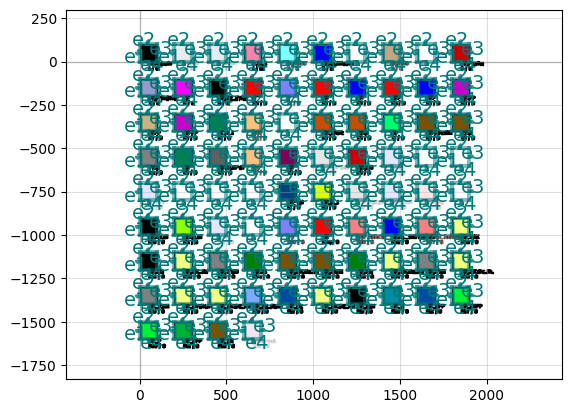

layerset: uid 0, ports [], references ['rectangle_1', 'text_1', 'rectangle_2', 'text_2', 'rectangle_3', 'text_3', 'rectangle_4', 'text_4', 'rectangle_5', 'text_5', 'rectangle_6', 'text_6', 'rectangle_7', 'text_7', 'rectangle_8', 'text_8', 'rectangle_9', 'text_9', 'rectangle_10', 'text_10', 'rectangle_11', 'text_11', 'rectangle_12', 'text_12', 'rectangle_13', 'text_13', 'rectangle_14', 'text_14', 'rectangle_15', 'text_15', 'rectangle_16', 'text_16', 'rectangle_17', 'text_17', 'rectangle_18', 'text_18', 'rectangle_19', 'text_19', 'rectangle_20', 'text_20', 'rectangle_21', 'text_21', 'rectangle_22', 'text_22', 'rectangle_23', 'text_23', 'rectangle_24', 'text_24', 'rectangle_25', 'text_25', 'rectangle_26', 'text_26', 'rectangle_27', 'text_27', 'rectangle_28', 'text_28', 'rectangle_29', 'text_29', 'rectangle_30', 'text_30', 'rectangle_31', 'text_31', 'rectangle_32', 'text_32', 'rectangle_33', 'text_33', 'rectangle_34', 'text_34', 'rectangle_35', 'text_35', 'rectangle_36', 'text_36', 'rectangle_37', 'text_37', 'rectangle_38', 'text_38', 'rectangle_39', 'text_39', 'rectangle_40', 'text_40', 'rectangle_41', 'text_41', 'rectangle_42', 'text_42', 'rectangle_43', 'text_43', 'rectangle_44', 'text_44', 'rectangle_45', 'text_45', 'rectangle_46', 'text_46', 'rectangle_47', 'text_47', 'rectangle_48', 'text_48', 'rectangle_49', 'text_49', 'rectangle_50', 'text_50', 'rectangle_51', 'text_51', 'rectangle_52', 'text_52', 'rectangle_53', 'text_53', 'rectangle_54', 'text_54', 'rectangle_55', 'text_55', 'rectangle_56', 'text_56', 'rectangle_57', 'text_57', 'rectangle_58', 'text_58', 'rectangle_59', 'text_59', 'rectangle_60', 'text_60', 'rectangle_61', 'text_61', 'rectangle_62', 'text_62', 'rectangle_63', 'text_63', 'rectangle_64', 'text_64', 'rectangle_65', 'text_65', 'rectangle_66', 'text_66', 'rectangle_67', 'text_67', 'rectangle_68', 'text_68', 'rectangle_69', 'text_69', 'rectangle_70', 'text_70', 'rectangle_71', 'text_71', 'rectangle_72', 'text_72', 'rectangle_73', 'text_73', 'rectangle_74', 'text_74', 'rectangle_75', 'text_75', 'rectangle_76', 'text_76', 'rectangle_77', 'text_77', 'rectangle_78', 'text_78', 'rectangle_79', 'text_79', 'rectangle_80', 'text_80', 'rectangle_81', 'text_81', 'rectangle_82', 'text_82', 'rectangle_83', 'text_83', 'rectangle_84', 'text_84'], 0 polygons

In [2]:
c = gf.layers.LAYER_COLORS.preview()
c

In [3]:
layer_wg = gf.LAYER.WG
print(layer_wg)

(1, 0)


## Extract layers

You can also extract layers using the `extract` function. This function returns a new flattened Component that contains the extracted layers.
A flat Component does not have references, and all the polygons are absorbed by the top cell.

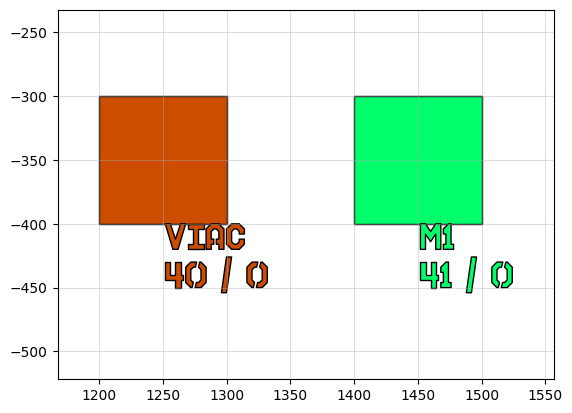

layerset_[[41, 0], [40, 0]]: uid 417, ports [], references [], 19 polygons

In [4]:
extract = c.extract(layers=(gf.LAYER.M1, gf.LAYER.VIAC))
extract

## Remove layers

You can remove layers using the `remove_layers()` function.

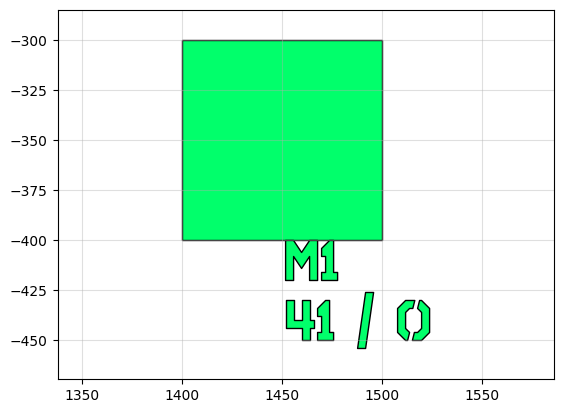

layerset_[[41, 0], [40, 0]]: uid 417, ports [], references [], 19 polygons

In [5]:
removed = extract.remove_layers(layers=(gf.LAYER.VIAC,))
removed

## Remap layers

You can remap (change the polygons from one layer to another layer) using the `remap_layer`, which will return a new `Component`

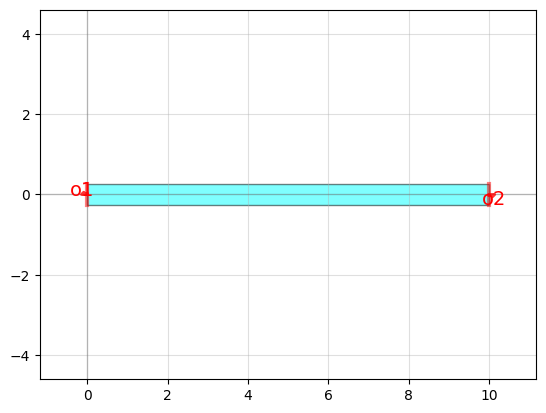

straight_layer2__0: uid 418, ports ['o1', 'o2'], references [], 4 polygons

In [6]:
c = gf.components.straight(layer=(2, 0))
c

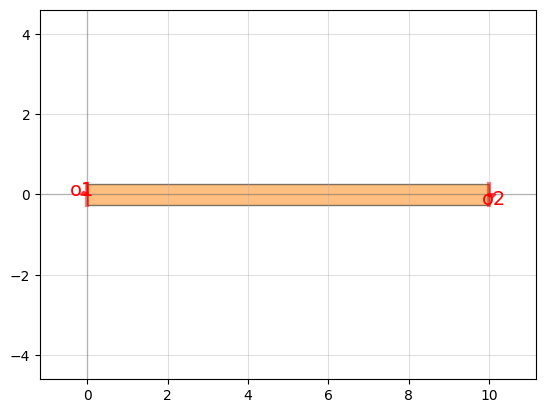

straight_layer2__0: uid 418, ports ['o1', 'o2'], references [], 4 polygons

In [7]:
remap = c.remap_layers(layermap={(2, 0): gf.LAYER.WGN})
remap

## LayerStack

Each layer also includes the information of thickness and position of each layer.

This LayerStack can be used for:

- render a 3D image
- FDTD simulations

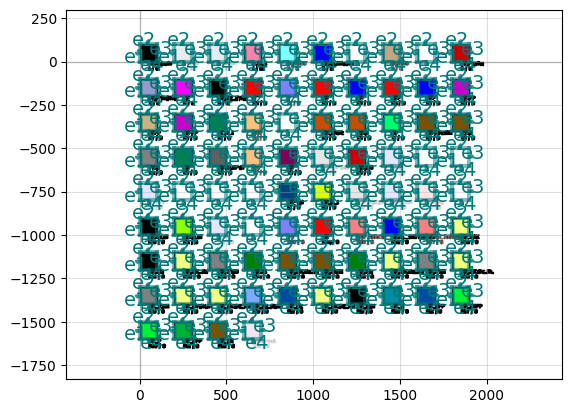

layerset: uid 420, ports [], references ['rectangle_1', 'text_1', 'rectangle_2', 'text_2', 'rectangle_3', 'text_3', 'rectangle_4', 'text_4', 'rectangle_5', 'text_5', 'rectangle_6', 'text_6', 'rectangle_7', 'text_7', 'rectangle_8', 'text_8', 'rectangle_9', 'text_9', 'rectangle_10', 'text_10', 'rectangle_11', 'text_11', 'rectangle_12', 'text_12', 'rectangle_13', 'text_13', 'rectangle_14', 'text_14', 'rectangle_15', 'text_15', 'rectangle_16', 'text_16', 'rectangle_17', 'text_17', 'rectangle_18', 'text_18', 'rectangle_19', 'text_19', 'rectangle_20', 'text_20', 'rectangle_21', 'text_21', 'rectangle_22', 'text_22', 'rectangle_23', 'text_23', 'rectangle_24', 'text_24', 'rectangle_25', 'text_25', 'rectangle_26', 'text_26', 'rectangle_27', 'text_27', 'rectangle_28', 'text_28', 'rectangle_29', 'text_29', 'rectangle_30', 'text_30', 'rectangle_31', 'text_31', 'rectangle_32', 'text_32', 'rectangle_33', 'text_33', 'rectangle_34', 'text_34', 'rectangle_35', 'text_35', 'rectangle_36', 'text_36', 'rectangle_37', 'text_37', 'rectangle_38', 'text_38', 'rectangle_39', 'text_39', 'rectangle_40', 'text_40', 'rectangle_41', 'text_41', 'rectangle_42', 'text_42', 'rectangle_43', 'text_43', 'rectangle_44', 'text_44', 'rectangle_45', 'text_45', 'rectangle_46', 'text_46', 'rectangle_47', 'text_47', 'rectangle_48', 'text_48', 'rectangle_49', 'text_49', 'rectangle_50', 'text_50', 'rectangle_51', 'text_51', 'rectangle_52', 'text_52', 'rectangle_53', 'text_53', 'rectangle_54', 'text_54', 'rectangle_55', 'text_55', 'rectangle_56', 'text_56', 'rectangle_57', 'text_57', 'rectangle_58', 'text_58', 'rectangle_59', 'text_59', 'rectangle_60', 'text_60', 'rectangle_61', 'text_61', 'rectangle_62', 'text_62', 'rectangle_63', 'text_63', 'rectangle_64', 'text_64', 'rectangle_65', 'text_65', 'rectangle_66', 'text_66', 'rectangle_67', 'text_67', 'rectangle_68', 'text_68', 'rectangle_69', 'text_69', 'rectangle_70', 'text_70', 'rectangle_71', 'text_71', 'rectangle_72', 'text_72', 'rectangle_73', 'text_73', 'rectangle_74', 'text_74', 'rectangle_75', 'text_75', 'rectangle_76', 'text_76', 'rectangle_77', 'text_77', 'rectangle_78', 'text_78', 'rectangle_79', 'text_79', 'rectangle_80', 'text_80', 'rectangle_81', 'text_81', 'rectangle_82', 'text_82', 'rectangle_83', 'text_83', 'rectangle_84', 'text_84'], 0 polygons

In [8]:
c = gf.layers.LAYER_COLORS.preview()
c

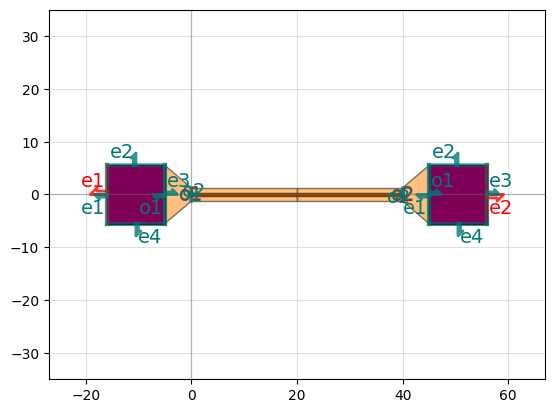

straight_heater_metal_u_d99b3f2a: uid 427, ports ['o1', 'o2', 'e1', 'e2'], references ['component_sequence_1', 'via_stack_1', 'via_stack_2', 'taper_1', 'taper_2'], 0 polygons

In [9]:
from gdsfactory.tech import LayerStack, LayerLevel, LAYER


def get_layer_stack_generic(
    thickness_silicon_core: float = 220e-3, thickness_cladding: float = 3.0
) -> LayerStack:
    """Returns generic LayerStack.
    based on paper https://www.degruyter.com/document/doi/10.1515/nanoph-2013-0034/html
    """
    return LayerStack(
        layers=dict(
            core=LayerLevel(
                layer=LAYER.WG,
                thickness=thickness_silicon_core,
                zmin=0.0,
                material="si",
            ),
            clad=LayerLevel(
                layer=LAYER.WGCLAD,
                thickness=thickness_cladding,
                zmin=0.0,
                material="sio2",
            ),
            slab150=LayerLevel(
                layer=LAYER.SLAB150,
                thickness=150e-3,
                zmin=0,
                material="si",
            ),
            slab90=LayerLevel(
                layer=LAYER.SLAB90,
                thickness=90e-3,
                zmin=0.0,
                material="si",
            ),
            nitride=LayerLevel(
                layer=LAYER.WGN,
                thickness=350e-3,
                zmin=220e-3 + 100e-3,
                material="sin",
            ),
            ge=LayerLevel(
                layer=LAYER.GE,
                thickness=500e-3,
                zmin=thickness_silicon_core,
                material="ge",
            ),
            via_contact=LayerLevel(
                layer=LAYER.VIAC,
                thickness=1100e-3,
                zmin=90e-3,
                material="Aluminum",
            ),
            metal1=LayerLevel(
                layer=LAYER.M1,
                thickness=750e-3,
                zmin=thickness_silicon_core + 1100e-3,
                material="Aluminum",
            ),
            heater=LayerLevel(
                layer=LAYER.HEATER,
                thickness=750e-3,
                zmin=thickness_silicon_core + 1100e-3,
                material="TiN",
            ),
            viac=LayerLevel(
                layer=LAYER.VIA1,
                thickness=1500e-3,
                zmin=thickness_silicon_core + 1100e-3 + 750e-3,
                material="Aluminum",
            ),
            metal2=LayerLevel(
                layer=LAYER.M2,
                thickness=2000e-3,
                zmin=thickness_silicon_core + 1100e-3 + 750e-3 + 1.5,
                material="Aluminum",
            ),
        )
    )


layer_stack220 = get_layer_stack_generic(thickness_silicon_core=0.220)

c = gf.components.straight_heater_metal(length=40)
c

In [10]:
scene = c.to_3d(layer_stack=layer_stack220)
scene.show()

In [11]:
# lets assume we have 9um silicon instead of 0.220um, You will see a much thicker waveguide under the metal heater.
layer_stack9000 = get_layer_stack_generic(thickness_silicon_core=9.0)
scene = c.to_3d(layer_stack=layer_stack9000)
scene.show()

## 3D rendering

To render components in 3D you will need to define two things:

1. LayerStack: for each layer contains thickness of each material and z position
2. LayerColors: for each layer contains colors (this file is the same that Klayout uses). You can load it with `gf.layers.load_lyp()`

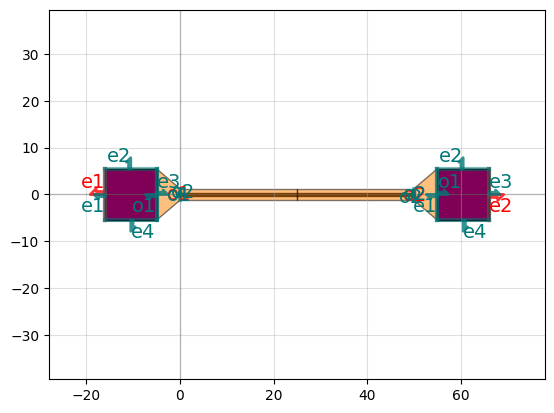

straight_heater_metal_u_d92d12b4: uid 438, ports ['o1', 'o2', 'e1', 'e2'], references ['component_sequence_1', 'via_stack_1', 'via_stack_2', 'taper_1', 'taper_2'], 0 polygons

In [12]:
heater = gf.components.straight_heater_metal(length=50)
heater

In [13]:
scene = heater.to_3d()
scene.show()

## 2.5D Klayout view

You can also get the script in klayout 2.D view.

In [14]:
from gdsfactory.tech import LAYER_STACK

LAYER_STACK.get_klayout_3d_script()

1/0: 0.0 0.22
111/0: 0.0 3.0
2/0: 0.0 0.15
3/0: 0.0 0.09
34/0: 0.32 0.67
5/0: 0.22 0.72
40/0: 0.09 1.1900000000000002
41/0: 1.32 2.0700000000000003
47/0: 1.32 2.0700000000000003
44/0: 2.0700000000000003 3.5700000000000003
45/0: 3.5700000000000003 5.57


Then you go go Tools → Manage Technologies


![klayout](https://i.imgur.com/KCcMRBO.png)

and Paste the script

![paste](https://i.imgur.com/CoTythB.png)


## Klayout cross-section

You can also install the [klayout cross-section plugin](https://gdsfactory.github.io/klayout_pyxs/README.html)

![xsection](https://i.imgur.com/xpPS8fM.png)

and customize the cross_section script that you need to use for your technology.

In [15]:
import pathlib
from gdsfactory.klayout.get_xsection_script import get_xsection_script
from gdsfactory.tech import LAYER


nm = 1e-3
if __name__ == "__main__":
    script = get_xsection_script(
        t_box=2.0,
        t_slab=110 * nm,
        t_si=220 * nm,
        t_ge=400 * nm,
        t_nitride=400 * nm,
        h_etch1=0.07,
        h_etch2=0.06,
        h_etch3=0.09,
        t_clad=0.6,
        t_m1=0.5,
        t_m2=0.5,
        t_m3=2.0,
        gap_m1_m2=0.6,
        gap_m2_m3=0.3,
        t_heater=0.1,
        gap_oxide_nitride=0.82,
        t_m1_oxide=0.6,
        t_m2_oxide=2.0,
        t_m3_oxide=0.5,
        layer_wg=LAYER.WG,
        layer_fc=LAYER.SLAB150,
        layer_rib=LAYER.SLAB90,
        layer_n=LAYER.N,
        layer_np=LAYER.NP,
        layer_npp=LAYER.NPP,
        layer_p=LAYER.P,
        layer_pp=LAYER.PP,
        layer_ppp=LAYER.PPP,
        layer_PDPP=LAYER.GEP,
        layer_nitride=LAYER.WGN,
        layer_Ge=LAYER.GE,
        layer_GePPp=LAYER.GEP,
        layer_GeNPP=LAYER.GEN,
        layer_viac=LAYER.VIAC,
        layer_viac_slot=LAYER.VIAC,
        layer_m1=LAYER.M1,
        layer_mh=LAYER.HEATER,
        layer_via1=LAYER.VIA1,
        layer_m2=LAYER.M2,
        layer_via2=LAYER.VIA2,
        layer_m3=LAYER.M3,
        layer_open=LAYER.PADOPEN,
    )

    # script_path = pathlib.Path(__file__).parent.absolute() / "xsection_planarized.pyxs"
    # script_path.write_text(script)
    print(script)



t_box=2.0
t_slab=0.11
t_si=0.22
t_ge=0.4
t_nitride=0.4
h_etch1=0.07
h_etch2=0.06
h_etch3=0.09
t_clad=0.6
t_m1=0.5
t_m2=0.5
t_m3=2.0
t_heater=0.1
gap_m1_m2=0.6
gap_m2_m3=0.3
gap_oxide_nitride=0.82
t_m1_oxide=0.6
t_m2_oxide=2.0
t_m3_oxide=0.5

l_wg = layer("1/0")
l_fc = layer("2/0")
l_rib = layer("3/0")

l_n = layer("20/0")
l_np = layer("22/0")
l_npp = layer("24/0")
l_p = layer("21/0")
l_pp = layer("23/0")
l_ppp = layer("25/0")
l_PDPP = layer("27/0")
l_bottom_implant = l_PDPP

l_nitride = layer("34/0")
l_Ge = layer("5/0")
l_GePPp = layer("27/0")
l_GeNPP = layer("26/0")

l_viac = layer("40/0")
l_viac_slot = layer("40/0")
l_m1 = layer("41/0")
l_mh = layer("47/0")
l_via1 = layer("44/0")
l_m2 = layer("45/0")
l_via2 = layer("43/0")
l_m3 = layer("49/0")
l_open = layer("46/0")

l_top_implant = l_GePPp.or_(l_GeNPP)
l_viac = l_viac.or_(l_viac_slot)

# Declare the basic accuracy used to remove artifacts for example: delta(5 * dbu)
delta(dbu)
depth(12.0)
height(12.0)

################ front-end



![xsection generic](https://i.imgur.com/H5Qiygc.png)